<a href="https://colab.research.google.com/github/calosos/py_resumenes_codigos/blob/main/C3_visualizaciones_barra_vilon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titulos, etiquetes 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style ='white')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto athlete_olympic_events-clean.csv', index_col=0)
df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'conteo'),
 Text(0.5, 0, 'edad'),
 Text(0.5, 1.0, 'Edades de atletas que partiviparon en los juego Olimpicos')]

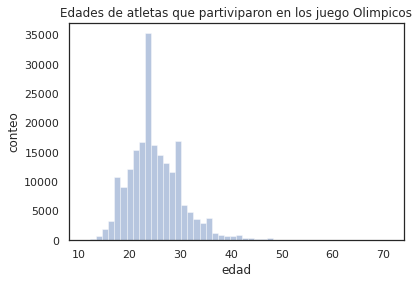

In [11]:
ax =sns.distplot(df['age'], kde =False, norm_hist=False)
ax.set(title = 'Edades de atletas que partiviparon en los juego Olimpicos',
       xlabel = 'edad', ylabel = 'conteo'); ## se usa ; para evitar lineas extas que da 

In [13]:
by_athlete = df.groupby(level=0)[['age','height', 'weight']].mean()
sex= df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index = True , right_index = True)
males = by_athlete[merged['sex']=='M']
females = by_athlete[merged['sex']=='F']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


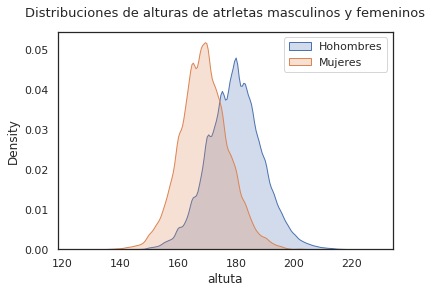

In [16]:
ax  = sns.distplot(males['height'],hist = False, kde_kws = {'shade' :True}, label='Hohombres')
sns.distplot(females['height'],hist = False, kde_kws = {'shade' :True},ax= ax, label='Mujeres')
ax.set_title('Distribuciones de alturas de atrletas masculinos y femeninos', fontsize = 13 , pad = 15);
ax.set(xlabel = 'altuta');
ax.legend(loc='upper right');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


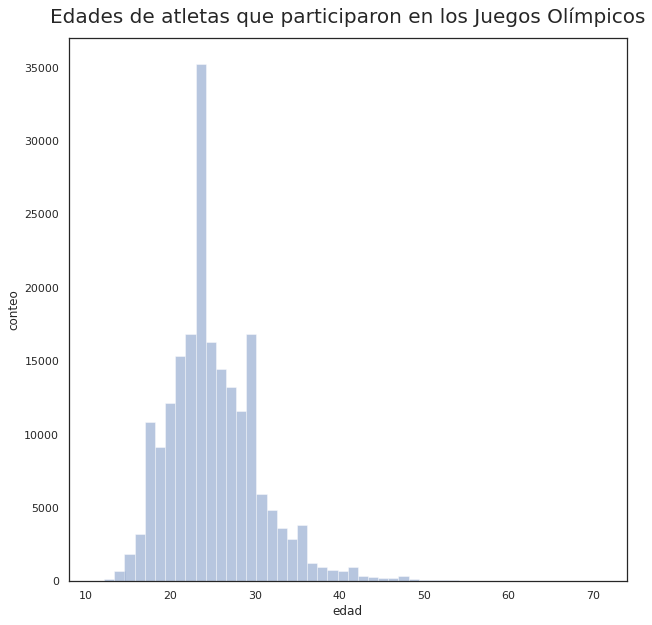

In [17]:
fig = plt.figure(figsize=(10, 10))
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set_title('Edades de atletas que participaron en los Juegos Olímpicos', fontsize=20, pad=15)
ax.set(xlabel='edad', ylabel='conteo');


#Gráfico de Barras 

In [18]:
df_two = pd.read_json('/content/drive/MyDrive/Remoto Datasets/Remoto zomato_reviews-clean.json')
df_two.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [20]:
df_two['user_rating'].unique()
#lista de cateogrías diferente 

array(['Very Good', 'Excellent', 'Poor', 'Good', 'Average', 'Not rated'],
      dtype=object)

In [22]:
df_two['user_rating'].nunique()
#número de categorías

6

In [33]:
count =df_two['user_rating'].value_counts()
count
#devuelvel conteo por categoría, en una serie



Very Good    490
Good         346
Excellent    194
Average      119
Not rated     26
Poor           5
Name: user_rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


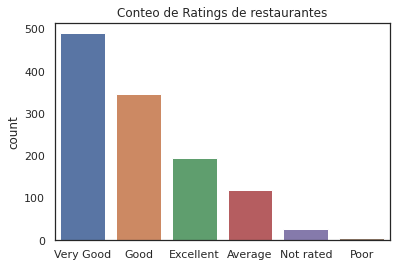

In [34]:
df_two['user_rating'].value_counts()
counts = df_two['user_rating'].value_counts()
ax = sns.barplot(counts.index, counts)
ax.set_title('Conteo de Ratings de restaurantes')
ax.set(ylabel='count');

In [38]:
#Pasar a porcentajes el eje  y
as_percentages = counts *100 /counts.sum()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


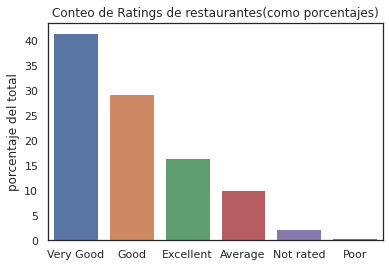

In [39]:
ax = sns.barplot(as_percentages.index, as_percentages)
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total');


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


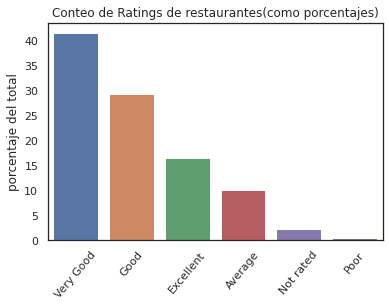

In [40]:
ax = sns.barplot(as_percentages.index, as_percentages)
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


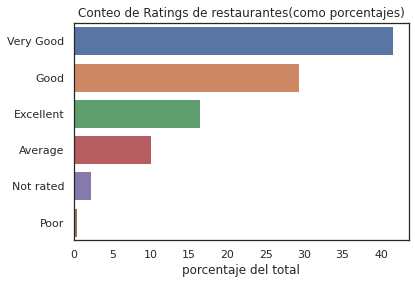

In [41]:
ax = sns.barplot(as_percentages, as_percentages.index, orient='h')
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(xlabel='porcentaje del total');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


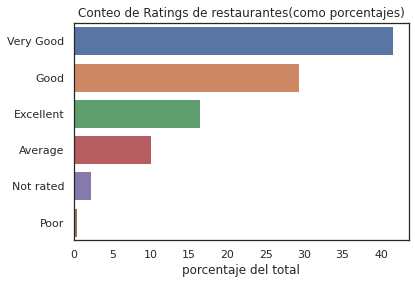

In [42]:
ax = sns.barplot(as_percentages, as_percentages.index, orient='h')
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(xlabel='porcentaje del total');

In [44]:
df_two['user_rating'].mode()

0    Very Good
dtype: object

In [46]:
pd.crosstab(df_two['price_range'], df_two['user_rating'])


user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


In [48]:
pd.crosstab(df_two['price_range'], df_two['user_rating'], margins=True, margins_name='total')

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good,total
price_range,,,,,,,
1,12,9,33,1,0,19,74
2,47,37,116,3,2,132,337
3,41,84,141,3,1,218,488
4,19,64,56,19,2,121,281
total,119,194,346,26,5,490,1180


In [49]:
pd.crosstab(df_two['price_range'], [df_two['has_online_delivery'], df_two['user_rating']], margins=True, margins_name='total')


has_online_delivery       0                                               1  \
user_rating         Average Excellent Good Not rated Poor Very Good Average   
price_range                                                                   
1                        12         8   32         1    0        15       0   
2                        47        30  104         3    1        99       0   
3                        40        70  132         3    1       183       1   
4                        19        61   52        19    2       113       0   
total                   118       169  320        26    4       410       1   

has_online_delivery                               total  
user_rating         Excellent Good Poor Very Good        
price_range                                              
1                           1    1    0         4    74  
2                           7   12    1        33   337  
3                          14    9    0        35   488  
4                           3    4    0         8   281  
total                      25   26    1        80  1180